### Pandas
  - pandas is like Excel in Python: 
  - it uses tables (namely DataFrame) and operates transformations on the data.

In [1]:
import pandas as pd
# Create dataframe from dict
# Specify the type in the suffix of each column name
my_df = pd.DataFrame({"A_int": [1, 2, -3],
                      "B_float": [7.5, 1.9, 8.4],
                      "C_str": ['eight', 'nine', 'Ten'],
                      "D_str": ['Apr 2019', 'May 2020', 'Jun 2021']}
                    )

In [2]:
my_df

,A_int,B_float,C_str,D_str
0,1,7.5,eight,Apr 2019
1,2,1.9,nine,May 2020
2,-3,8.4,Ten,Jun 2021


In [3]:
# Convert to datetime column
my_df['D_date'] = pd.to_datetime(my_df['D_str'])

In [4]:
my_df

,A_int,B_float,C_str,D_str,D_date
0,1,7.5,eight,Apr 2019,2019-04-01
1,2,1.9,nine,May 2020,2020-05-01
2,-3,8.4,Ten,Jun 2021,2021-06-01


In [5]:
## Show loc example 1 ##
ex_1_loc = my_df.loc[my_df['A_int'] > 0, :]
ex_1_loc

,A_int,B_float,C_str,D_str,D_date
0,1,7.5,eight,Apr 2019,2019-04-01
1,2,1.9,nine,May 2020,2020-05-01


In [7]:
#ex_1_loc = my_df.loc[my_df['A_int'] > 0, :]
ex_1_query = my_df.query("A_int > 0")

# Or use @ when referencing a variable
pivot_val = 0
ex_1a_query = my_df.query("A_int > @pivot_val")

In [8]:
ex_1_query

,A_int,B_float,C_str,D_str,D_date
0,1,7.5,eight,Apr 2019,2019-04-01
1,2,1.9,nine,May 2020,2020-05-01


In [9]:
ex_1a_query

,A_int,B_float,C_str,D_str,D_date
0,1,7.5,eight,Apr 2019,2019-04-01
1,2,1.9,nine,May 2020,2020-05-01


In [10]:
# Create a list of legitimate entries
legit_entries = ['eight', 'nine', 'ten']

# Filter column 'C_str' by the array
ex_2_loc = my_df.loc[my_df['C_str'].isin(legit_entries), :]  # case 1
ex_2_query = my_df.query("C_str in @legit_entries")          # case are same

In [11]:
ex_2_loc

,A_int,B_float,C_str,D_str,D_date
0,1,7.5,eight,Apr 2019,2019-04-01
1,2,1.9,nine,May 2020,2020-05-01


In [12]:
ex_2_query

,A_int,B_float,C_str,D_str,D_date
0,1,7.5,eight,Apr 2019,2019-04-01
1,2,1.9,nine,May 2020,2020-05-01


In [13]:
# Column comparison
# this requires triple handling in the .loc example.
# Return rows where 'A_int' is greater than 'B_float'
ex_3_loc = my_df.loc[my_df['A_int'] > my_df['B_float'], :]  # case 1
ex_3_query = my_df.query("A_int > B_float")                 # case 2 are same

In [14]:
my_df

,A_int,B_float,C_str,D_str,D_date
0,1,7.5,eight,Apr 2019,2019-04-01
1,2,1.9,nine,May 2020,2020-05-01
2,-3,8.4,Ten,Jun 2021,2021-06-01


In [15]:
ex_3_loc

,A_int,B_float,C_str,D_str,D_date
1,2,1.9,nine,May 2020,2020-05-01


In [16]:
ex_3_query

,A_int,B_float,C_str,D_str,D_date
1,2,1.9,nine,May 2020,2020-05-01


In [17]:
ex_3_loc == ex_3_query

,A_int,B_float,C_str,D_str,D_date
1,True,True,True,True,True


In [18]:
# Multi-conditional filtering
# Filter using multiple conditions over potentially multiple columns. 
# Both & and | bitwise operators are allowed.

# Return rows where 'A_int' is greater than zero
# And where C_str is in the legit_entries array
ex_4_loc = my_df.loc[(my_df["A_int"] > 0) &
                     (my_df['C_str'].isin(legit_entries)), :]   # case 1
ex_4_query = my_df.query("A_int > 0 & C_str in @legit_entries") # case 2 are same

In [19]:
ex_4_loc

,A_int,B_float,C_str,D_str,D_date
0,1,7.5,eight,Apr 2019,2019-04-01
1,2,1.9,nine,May 2020,2020-05-01


In [20]:
ex_4_query

,A_int,B_float,C_str,D_str,D_date
0,1,7.5,eight,Apr 2019,2019-04-01
1,2,1.9,nine,May 2020,2020-05-01


In [23]:
# Timestamps
# Query recognises dates and can compare them to strings. 
# All strings inside a query quote must be quoted.

# Return rows where D_date is after Jan 2018
ex_5_loc = my_df.loc[my_df['D_date'] > 'Jan 2020', :]
ex_5_query = my_df.query("D_date > 'Jan 2020'")

In [24]:
ex_5_loc

,A_int,B_float,C_str,D_str,D_date
1,2,1.9,nine,May 2020,2020-05-01
2,-3,8.4,Ten,Jun 2021,2021-06-01


In [25]:
ex_5_query

,A_int,B_float,C_str,D_str,D_date
1,2,1.9,nine,May 2020,2020-05-01
2,-3,8.4,Ten,Jun 2021,2021-06-01


In [26]:
# First convert C_str to lowercase, than compare entries
ex_6_loc = my_df.loc[my_df['C_str'].str.lower().isin(legit_entries), :] # case 1
ex_6_query = my_df.query("C_str.str.lower() in @legit_entries")         # case 2 are same

In [27]:
ex_6_loc

,A_int,B_float,C_str,D_str,D_date
0,1,7.5,eight,Apr 2019,2019-04-01
1,2,1.9,nine,May 2020,2020-05-01
2,-3,8.4,Ten,Jun 2021,2021-06-01


In [28]:
ex_6_query

,A_int,B_float,C_str,D_str,D_date
0,1,7.5,eight,Apr 2019,2019-04-01
1,2,1.9,nine,May 2020,2020-05-01
2,-3,8.4,Ten,Jun 2021,2021-06-01


In [29]:
# Column names containing spaces
# Return rows where 'E rogue column str' column contains the word 'this'
my_df['E column_str'] = ['this', 'and', 'that']
my_df

,A_int,B_float,C_str,D_str,D_date,E column_str
0,1,7.5,eight,Apr 2019,2019-04-01,this
1,2,1.9,nine,May 2020,2020-05-01,and
2,-3,8.4,Ten,Jun 2021,2021-06-01,that


In [32]:
ex_7_loc = my_df.loc[my_df["E column_str"] == 'this', :] # case 1
ex_7_query = my_df.query("`E column_str` == 'this'")     # case 2 are same

In [33]:
ex_7_loc

,A_int,B_float,C_str,D_str,D_date,E column_str
0,1,7.5,eight,Apr 2019,2019-04-01,this


In [34]:
ex_7_query

,A_int,B_float,C_str,D_str,D_date,E column_str
0,1,7.5,eight,Apr 2019,2019-04-01,this


In [35]:
import pandas as pd

# 인터넷에서 가져오기(UC어바인대학 아카이브)
file_name = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
df = pd.read_csv(file_name)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [36]:
len(df)

150

In [39]:
df.to_csv("./iris.csv", index=False) # save into the current folder without index

In [40]:
df_iris = pd.read_csv("./iris.csv")
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [58]:
sepal_length_mean = df_iris['sepal_length'].mean()
print(f"the mean of the sepal_length is {round(sepal_length_mean, 1)}cm.")
df_iris.query('sepal_length > @sepal_length_mean')

the mean of the sepal_length is 5.8cm.


,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
56,6.3,3.3,4.7,1.6,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [45]:
df_iris.query('sepal_length > @sepal_length_mean').head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
56,6.3,3.3,4.7,1.6,versicolor


In [52]:
df_iris.query('sepal_length > @sepal_length_mean').tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [55]:
df_iris.nlargest(3, "sepal_length")

,sepal_length,sepal_width,petal_length,petal_width,species
131,7.9,3.8,6.4,2.0,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica


In [56]:
df_iris.nsmallest(3, "sepal_length")

,sepal_length,sepal_width,petal_length,petal_width,species
13,4.3,3.0,1.1,0.1,setosa
8,4.4,2.9,1.4,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa


In [59]:
df_iris.to_excel("./iris.xlsx", index=False) # save into the current folder without index

In [61]:
df_iris_excel = pd.read_excel("./iris.xlsx") # read the excel file

In [62]:
df_iris_excel

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [67]:
df.iloc[0:5, :] # means df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [70]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [68]:
df.iloc[-5: , :] # means df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [69]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [73]:
df.iloc[[0]] # first row with full cols

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [74]:
df.iloc[[-1]] # last row with full cols

,sepal_length,sepal_width,petal_length,petal_width,species
149,5.9,3.0,5.1,1.8,virginica


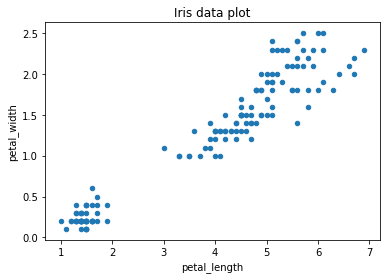

In [85]:
# plot 메서드의 kind라는 인수를 바꾸면 여러가지 플롯을 그릴 수 있다. 
# 다음과 같은 인수값을 지원한다.(기본적인 그림 도구만 제공)
# bar
# pie
# hist
# kde
# box
# scatter
# area

%matplotlib inline
import matplotlib.pyplot as plt

df.plot(x='petal_length', y='petal_width', kind="scatter")
plt.title("Iris data plot")
plt.show()

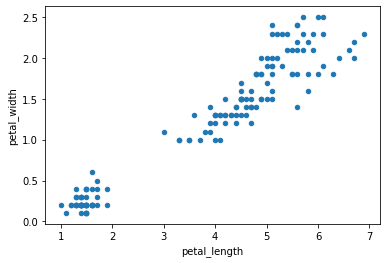

In [84]:
# kind 종류를 바로 plot에 붙여서도 사용가능하다.
df.plot.scatter(x='petal_length', y='petal_width')
plt.show()

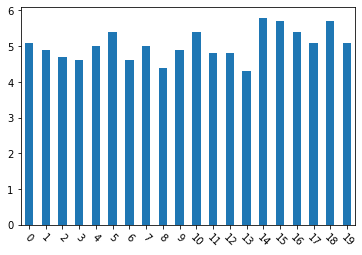

In [89]:
df.sepal_length[:20].plot(kind='bar', rot=-45)
plt.show()

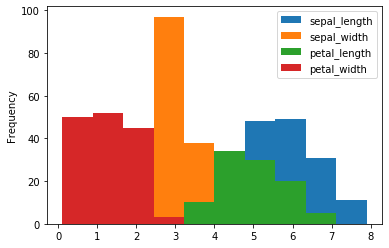

In [91]:
df.plot.hist()
plt.show()

In [95]:
pd.qcut(range(10), 3, labels=["young", 'middle', 'old'])

[young, young, young, young, middle, middle, middle, old, old, old]
Categories (3, object): [young < middle < old]